<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data description

## `crim`

per capita crime rate by town.

## `zn`

proportion of residential land zoned for lots over 25,000 sq.ft.

## `indus`

proportion of non-retail business acres per town.

## `chas`

Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

## `nox`

nitrogen oxides concentration (parts per 10 million).

## `rm`

average number of rooms per dwelling.

## `age`

proportion of owner-occupied units built prior to 1940.

## `dis`

weighted mean of distances to five Boston employment centres.

## `rad`

index of accessibility to radial highways.

## `tax`

full-value property-tax rate per $10,000.

## `ptratio`

pupil-teacher ratio by town.

## `black`

1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

## `lstat`

lower status of the population (percent).

## `medv`

median value of owner-occupied homes in $1000s.

# Linear Regression Manual

In [7]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# 'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# boston = datasets.load_boston(return_X_y=True)
# boston

In [8]:
medv = boston['medv'].to_numpy().reshape(-1,1)

rm = boston['rm'].to_numpy().reshape(-1,1)
lstat = boston['lstat'].to_numpy().reshape(-1,1)
ptratio = boston['ptratio'].to_numpy().reshape(-1,1)

tax = boston['tax'].to_numpy().reshape(-1,1)
crim = boston['crim'].to_numpy().reshape(-1,1)
zn = boston['zn'].to_numpy().reshape(-1,1)
indus = boston['indus'].to_numpy().reshape(-1,1)
chas = boston['chas'].to_numpy().reshape(-1,1)
nox = boston['nox'].to_numpy().reshape(-1,1)
age = boston['age'].to_numpy().reshape(-1,1)
dis = boston['dis'].to_numpy().reshape(-1,1)
rad = boston['rad'].to_numpy().reshape(-1,1)
b = boston['b'].to_numpy().reshape(-1,1)

# Parameters
# rm, lstat, ptratio, tax, crim, zn, indus, chas, nox, age, dis, rad, b

# TRAIN_TEST_RATIO = 0.9
# train_number = round(X.shape[0] * TRAIN_TEST_RATIO)
# X_train = rm[:train_number]
# Y_train = medv[:train_number]

# X_test = rm[train_number:]
# Y_test = medv[train_number:]

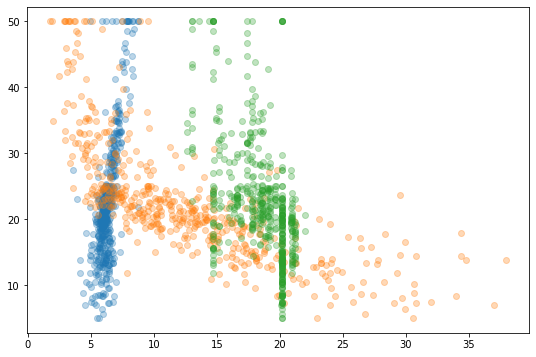

In [9]:
plt.figure(figsize=(9,6))
plt.plot(rm, medv,'o', alpha = 0.3)
plt.plot(lstat, medv, 'o', alpha = 0.3)
plt.plot(ptratio, medv, 'o', alpha = 0.3)

# plt.plot(tax, medv, 'o', alpha = 0.3)
# plt.plot(crim, medv, 'o', alpha = 0.3)
# plt.plot(zn, medv, 'o', alpha = 0.3)
# plt.plot(indus, medv, 'o', alpha = 0.3)
# plt.plot(chas, medv, 'o', alpha = 0.3)
# plt.plot(nox, medv, 'o', alpha = 0.3)
# plt.plot(age, medv, 'o', alpha = 0.3)
# plt.plot(dis, medv, 'o', alpha = 0.3)
# plt.plot(rad, medv, 'o', alpha = 0.3)
# plt.plot(b, medv, 'o', alpha = 0.3)

## Main w/ one input

In [10]:
class LinearRegression:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        self.w = 0.
        self.b = 0.
    
    def mse(self, y_, y):
        return np.sum(np.square(y_ - y)) / y.shape[0]

    def predict(self, X):
        return self.w * X + self.b
    
    def w_corr(self, y_, y, X):
        return 2 / y.shape[0] * np.sum((y_ - y) * X)
        
    def b_corr(self, y_, y):
        return 2 / y.shape[0] * np.sum(y_ - y)

    def train(self, X, y):
        for i in range(self.gens):
            y_ = self.predict(X)
            
            self.w = self.w - self.lr * self.w_corr(y_, y, X)
            self.b = self.b - self.lr * self.b_corr(y_, y)
        
        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}\tB: {}".format(self.w,self.b))
        print("MSE: {}".format(self.mse(y_, y)))

## Initiation

In [11]:
model = LinearRegression(10e-5, 1500000)    # Да, это жестко

## Training and Results


Iteration: 1500000/1500000
W: 8.69296817765321	B: -32.06802784262743
MSE: 43.68400670303658

Iteration: 1500000/1500000
W: -0.9500493537535698	B: 34.5538408793094
MSE: 38.48296722989415

Iteration: 1500000/1500000
W: -2.1313773061565557	B: 61.861991948725816
MSE: 62.655355735925305


<function matplotlib.pyplot.show>

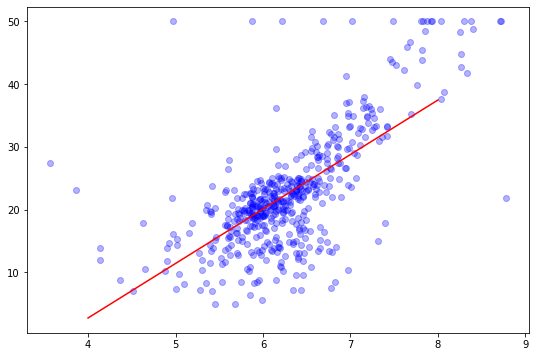

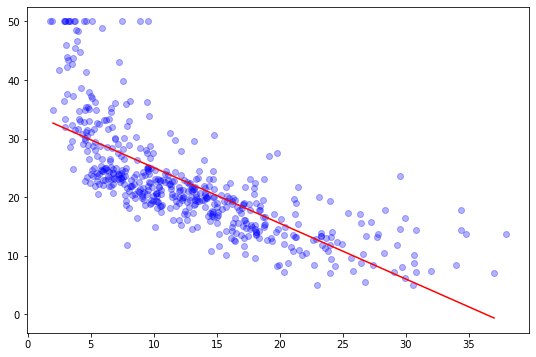

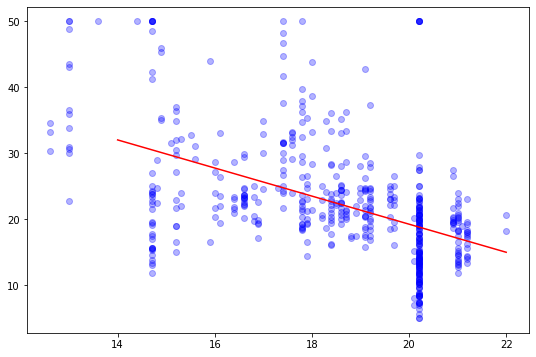

In [13]:
model.train(rm, medv)
plt.figure(figsize=(9,6))
plt.plot(rm, medv,'bo', alpha = 0.3)
xx = np.arange(4, 9).reshape(-1, 1)
plt.plot(xx, model.predict(xx),'r')

model.train(lstat, medv)
plt.figure(figsize=(9,6))
plt.plot(lstat, medv,'bo', alpha = 0.3)
xx = np.arange(2, 38).reshape(-1, 1)
plt.plot(xx, model.predict(xx),'r')

model.train(ptratio, medv)
plt.figure(figsize=(9,6))
plt.plot(ptratio, medv,'bo', alpha = 0.3)
xx = np.arange(14, 23).reshape(-1, 1)
plt.plot(xx, model.predict(xx),'r')

plt.show

# Linear Regression SKLearn
w/ one input

Coefficients: 
 [[9.10210898]]
Coefficients: 
 [-34.67062078]


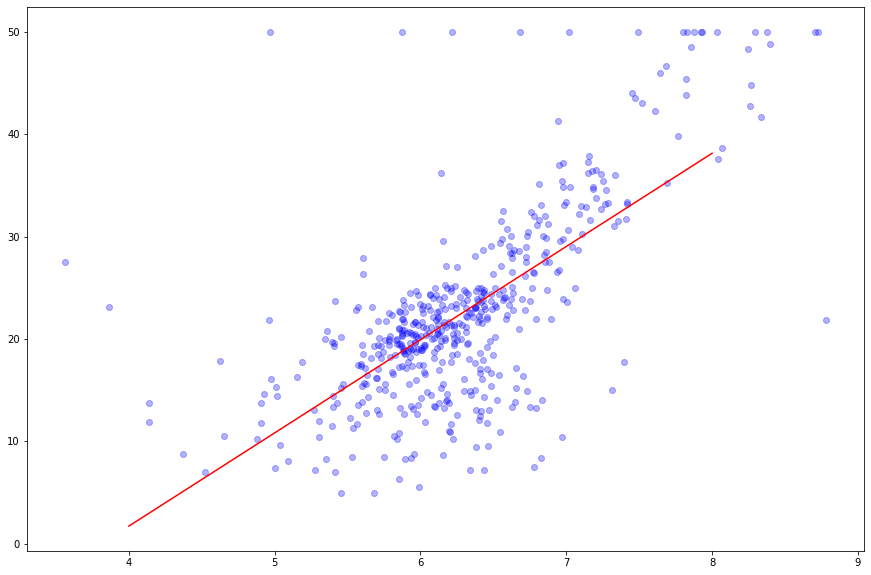

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(rm, medv)

# Make predictions using the testing set
xx = np.arange(4, 9).reshape(-1, 1)
y_ = regr.predict(xx)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Coefficients: \n', regr.intercept_)

# Plot outputs
plt.figure(figsize=(15,10))
plt.plot(rm, medv, 'bo', alpha = 0.3)
plt.plot(xx, y_, 'r')

plt.show()

# MultiInput

## ~~Not~~ working...??

In [15]:
# inputs = np.asarray([rm, lstat, ptratio])
# inputs = np.concatenate((rm, lstat, ptratio), axis = 1)
# tax, crim, zn, indus, chas, nox, age, dis, rad, b

# Tough version
# 13 inputs
def turnFine_13(a, b, c, d, e, f, g, h, i, j, k, l, m):
    inputs = np.empty([a.shape[0],13,1])
    for ii in range(a.shape[0]):
        frame = np.concatenate((a[ii], b[ii], c[ii], d[ii], e[ii], f[ii], g[ii], h[ii], i[ii], j[ii], k[ii], l[ii], m[ii]), axis = 0).reshape(-1,1)
        inputs[ii] = frame
    return inputs

# Light version
# 3 inputs
def turnFine(a, b, c):
    inputs = np.empty([a.shape[0],3,1])
    for i in range(a.shape[0]):
        frame = np.concatenate((a[i], b[i], c[i]), axis = 0).reshape(-1,1)
        inputs[i] = frame
    return inputs

# for i in range(rm.shape[0]):
#     frame = np.concatenate((rm[i], lstat[i], ptratio[i]), axis = 0).reshape(-1,1)
#     inputs[i] = frame
# frame.shape, inputs.shape
# inputs

In [16]:
np.zeros((1,3))[0][2]
# for i in range(506):
#     res = np.dot(np.array([2,2,2]), inputs[i])
# res.shape

0.0

In [115]:
class LinearRegression_MultiInputs:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        # Change '13' or '3' for different approach
        self.w = np.random.rand(1,3)
        self.b = 0.
    

    def w_corr(self, y_, y, X):
        # print("w", y_[0].shape, y.shape, X.shape)
        return 1 / y.shape[0] * np.sum((y_[0] - y) * X)
    def b_corr(self, y_, y):
        return 1 / y.shape[0] * np.sum(y_[0] - y)
    def mse(self, y_, y):
        return np.sum((y_ - y)**2) / y.shape[0]
    

    def predict(self, X):
        return np.dot(self.w, X) + self.b

    # For 3 inputs
    def train(self, X, y):
        for i in range(self.gens):
            y_ = self.predict(X)
            for j in range(3):
                self.w -= self.lr * self.w_corr(y_, y, X[:,j])
                self.b -= self.lr * self.b_corr(y_, y)        
        
        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}, {}, {}\tB: {}".format(self.w[0][0],self.w[0][1],self.w[0][2],self.b))
        print("MSE: {}".format(self.mse(y_, y)))



class LinearRegression_MultiInputs13:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        # Change '13' or '3' for different approach
        self.w = np.random.rand(1,13)
        self.b = 0.

    
    def w_corr(self, y_, y, X):
        # print("w", y_[0].shape, y.shape, X.shape)
        return 1 / y.shape[0] * np.sum((y_[0] - y) * X)
    def b_corr(self, y_, y):
        return 1 / y.shape[0] * np.sum(y_[0] - y)
    def mse(self, y_, y):
        return np.sum((y_ - y)**2) / y.shape[0]
    

    def predict(self, X):
        return np.dot(self.w, X) + self.b
    # For 13 inputs 
    def train_13(self, X, y):
        for i in range(self.gens):
            y_ = self.predict(X)
            for j in range(13):
                self.w -= self.lr * self.w_corr(y_, y, X[:,j])
                self.b -= self.lr * self.b_corr(y_, y)  
            # print("mse", self.mse(y_,y))
                    
        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}\tB: {}".format(self.w[0][0],self.w[0][1],self.w[0][2],self.w[0][3],self.w[0][4],self.w[0][5],self.w[0][6],self.w[0][7],self.w[0][8],self.w[0][9],self.w[0][10],self.w[0][11],self.w[0][12],self.b))
        print("MSE: {}".format(self.mse(y_, y)))

In [98]:
model_m = LinearRegression_MultiInputs(10e-4, 15000) # just you wait...

In [101]:
# model_m.train(inputs, medv)
model_m.train(turnFine(rm, lstat, ptratio), medv)


Iteration: 15000/15000
W: -1.438287582426592, -0.9053773967037403, -0.965569256111953	B: 60.83827006878469
MSE: 37.965291183653314


(1, 5, 1)


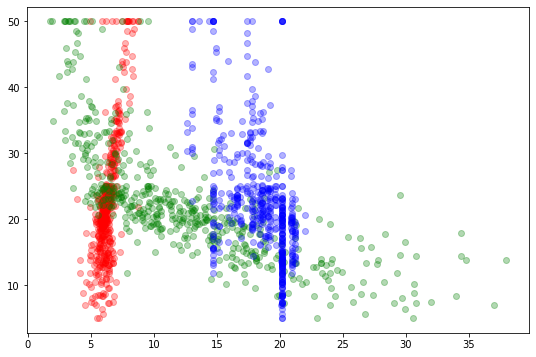

In [102]:
plt.figure(figsize=(9,6))
plt.plot(rm, medv,'ro', alpha = 0.3)
plt.plot(lstat, medv,'go', alpha = 0.3)
plt.plot(ptratio, medv,'bo', alpha = 0.3)

aa = np.arange(4, 9).reshape(-1, 1)
bb = np.arange(10, 15).reshape(-1, 1)
cc = np.arange(15, 20).reshape(-1, 1)
# aa, bb, cc
# print(turnFine(aa,bb,cc))
y_ = model_m.predict(turnFine(aa,bb,cc))
print(y_.shape)

# plt.plot(aa, y_[0], 'black', alpha = 0.75)
# plt.plot(bb, y_[0], 'black', alpha = 0.75)
# plt.plot(cc, y_[0], 'black', alpha = 0.75)
# Plot outputs
# plt.plot(aa, bb, cc, y_, 'b')

# plt.show

In [116]:
model_m13 = LinearRegression_MultiInputs13(10e-7, 15000)
model_m13.train_13(turnFine_13(rm, lstat, ptratio, tax, crim, zn, indus, chas, nox, age, dis, rad, b),medv)


Iteration: 15000/15000
W: 0.47908880240055607, -0.17983503867055659, -0.2006192938369394, -0.015300471447625447, -0.2460349771216271, -0.12120294932475527, 0.04941117071977459, -0.16145132971488127, -0.13545903126859213, -0.2141928774270254, 0.11912234396750936, 0.09924736451058937, 0.13285527127558364	B: -0.09403990516892471
MSE: 225.53154242762682


In [119]:
params = ['rm', 'lstat', 'ptratio','tax', 'crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'b']
for i in range(13):
    print("W-{}: {} * 10e-3\n".format(params[i], model_m13.w[0][i]*1000))

W-rm: 479.08880240055606 * 10e-3

W-lstat: -179.83503867055657 * 10e-3

W-ptratio: -200.61929383693942 * 10e-3

W-tax: -15.300471447625446 * 10e-3

W-crim: -246.03497712162712 * 10e-3

W-zn: -121.20294932475527 * 10e-3

W-indus: 49.41117071977459 * 10e-3

W-chas: -161.45132971488127 * 10e-3

W-nox: -135.45903126859213 * 10e-3

W-age: -214.1928774270254 * 10e-3

W-dis: 119.12234396750935 * 10e-3

W-rad: 99.24736451058936 * 10e-3

W-b: 132.85527127558365 * 10e-3



## SKLearn

In [120]:
X = boston[['rm','lstat','ptratio']]
Y = boston['medv']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# # with statsmodels
# X = sm.add_constant(X) # adding a constant
 
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
# print_model = model.summary()
# print(print_model)

Intercept: 
 18.567111505395236
Coefficients: 
 [ 4.51542094 -0.57180569 -0.93072256]


In [121]:
X = boston[['rm','lstat','ptratio','tax','crim','zn','indus','chas','nox','age','dis','rad','b']]
Y = boston['medv']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_,'\n')
for i in range(13):
    print("W-{}: {}\n".format(params[i], regr.coef_[i]))
# print('Coefficients: \n', regr.coef_)

Intercept: 
 36.45948838509017 

W-rm: 3.809865206809197

W-lstat: -0.5247583778554907

W-ptratio: -0.9527472317072971

W-tax: -0.012334593916574543

W-crim: -0.1080113578367979

W-zn: 0.04642045836688119

W-indus: 0.020558626367073105

W-chas: 2.6867338193447785

W-nox: -17.766611228300125

W-age: 0.0006922246403445464

W-dis: -1.4755668456002577

W-rad: 0.3060494789851765

W-b: 0.009311683273793947

